In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import xlrd
import numpy as np
from matplotlib_venn import venn2, venn3
import openpyxl
import seaborn as sns
from openpyxl import load_workbook

In [21]:
mapp='WF'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_WF = pd.DataFrame()
WF_samples=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Accession'].fillna("Not available", inplace = True) 
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data = data.loc[(data['#Feature'] >= 4)]
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum() 
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_WF = df_WF.append(data)  # appends all data
    print(file+': '+str(len(data['Peptide'])))
    WF_samples.append(data['Peptide'])

mapp='peptide_sample_ninf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_ninf = pd.DataFrame()
non_inf_patients=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Accession'].fillna("Not available", inplace = True) 
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.loc[(data['#Feature'] >= 4)] 
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_ninf = df_ninf.append(data)  # appends all data
    non_inf_patients.append(data['Peptide'])

mapp='peptide_sample_inf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_inf = pd.DataFrame()
inf_patients=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Accession'].fillna("Not available", inplace = True) 
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.loc[(data['#Feature'] >= 4)] 
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_inf = df_inf.append(data)  # appends all data
    inf_patients.append(data['Peptide'])

df_ninf['count'] = 1
df_WF['count'] = 1
df_inf['count']=1


peptide _WF1.xlsx: 811
peptide_WF2.xlsx: 934
peptide_WF3.xlsx: 900
peptide_WF4.xlsx: 572
peptide_WF5.xlsx: 846


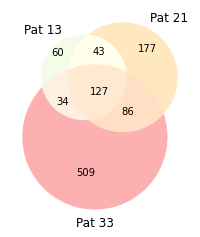

In [4]:
color=['#e4f8c7','#ffc561','#f93b3b']
v=venn3([set(non_inf_patients[0]),set(non_inf_patients[1]),set(non_inf_patients[2])], set_labels=('Pat 13','Pat 21','Pat 33'), set_colors=color)

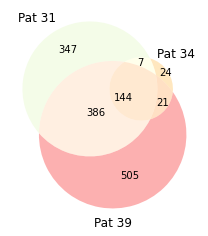

In [5]:
venn3([set(inf_patients[0]),set(inf_patients[1]),set(inf_patients[2])], set_labels=('Pat 31', 'Pat 34','Pat 39'), set_colors=color)

In [22]:
#Wound fluid
df_WF_all=pd.DataFrame()
df_WF_all['Peptide']=df_WF['Peptide']
df_WF = df_WF.groupby(['Accession','Peptide']).sum()
df_WF.reset_index(['Peptide'], inplace=True)
df_WF = df_WF[['Peptide', '#Feature', '#Feature WF1','#Feature WF2', '#Feature WF 3', '#Feature WF4','#Feature WF5','count']]
df_WF = df_WF.sort_values(['count','#Feature'], ascending=False)

#Non-infected patients
df_ninf_all=pd.DataFrame()
df_ninf_all['Peptide']=df_ninf['Peptide']

df_ninf = df_ninf.groupby(['Accession','Peptide']).sum()
df_ninf.reset_index(['Peptide'], inplace=True)
df_ninf = df_ninf[['Peptide','#Feature','#Feature Sample 13', '#Feature Sample 21', '#Feature Sample 33','count',]]
df_ninf = df_ninf.sort_values(['count','#Feature'], ascending=False)

#infected patients
df_inf_all=pd.DataFrame()
df_inf_all['Peptide']=df_inf['Peptide']

df_inf = df_inf.groupby(['Accession','Peptide']).sum()
df_inf.reset_index(['Peptide'], inplace=True)
df_inf = df_inf[['Peptide','#Feature','#Feature Sample 31', '#Feature Sample 34', '#Feature Sample 39','count',]]
df_inf = df_inf.sort_values(['count','#Feature'], ascending=False)

In [23]:
df_ninf_same=df_ninf.loc[(df_ninf['count']==3)]
df_WF_same=df_WF.loc[(df_WF['count']==5)]

df_WF_ninf=df_WF_same.append(df_ninf_same)
df_WF_ninf.reset_index()
df_WF_ninf=df_WF_ninf.groupby(['Accession','Peptide']).sum()
df_WF_ninf.sort_values(['count','#Feature'], ascending=False)
df_WF_same

,Peptide,#Feature,#Feature WF1,#Feature WF2,#Feature WF 3,#Feature WF4,#Feature WF5,count
Accession,,,,,,,,
sp|Q04206|TF65_HUMAN,PSLQAPVR,160,23.0,8.0,38.0,52.0,38.0,5
sp|P04406|G3P_HUMAN,AVGKVIPELNGKLTGMAF,65,12.0,12.0,16.0,18.0,7.0,5
sp|P06727|APOA4_HUMAN,NHQLEGLTF,58,9.0,11.0,10.0,15.0,13.0,5
sp|Q14624|ITIH4_HUMAN,NFRPGVL,58,13.0,13.0,14.0,6.0,12.0,5
sp|Q14624|ITIH4_HUMAN,SRQLGLPGPPDVPDHA,56,12.0,14.0,11.0,8.0,11.0,5
...,...,...,...,...,...,...,...,...
sp|P35579|MYH9_HUMAN,DLPFVVPR,20,4.0,4.0,4.0,4.0,4.0,5
sp|P69905|HBA_HUMAN,FPHFDLS,20,4.0,4.0,4.0,4.0,4.0,5
sp|P69905|HBA_HUMAN,MFLSFPTTK,20,4.0,4.0,4.0,4.0,4.0,5


Text(0.5, 1.0, 'WF intersection as part of total WF')

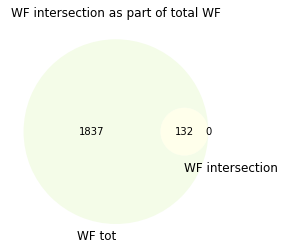

In [9]:
venn2([set(df_WF_all['Peptide']), set(df_WF_same['Peptide'])], set_labels = ('WF tot', 'WF intersection'), set_colors=color)
plt.title('WF intersection as part of total WF')

Text(0.5, 1.0, 'WF vs non-infected overlap')

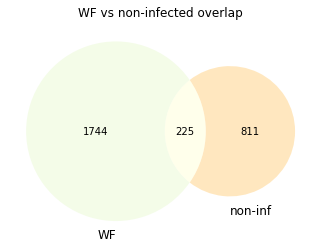

In [10]:
venn2([set(df_WF['Peptide']), set(df_ninf['Peptide'])], set_labels = ('WF', 'non-inf'), set_colors=color)
plt.title('WF vs non-infected overlap')

In [24]:
df_inf_same=df_inf.loc[(df_inf['count']==3)]

df_ninf_inf=df_ninf_same.append(df_inf_same)
df_ninf_inf.reset_index()
#df_ninf_inf=df_ninf_inf.groupby(['Accession','Peptide']).sum()
df_ninf_inf=df_ninf_inf.sort_values(['count','#Feature'], ascending=False)
df_ninf_inf['Difference (ninf-inf)']=((df_ninf_inf['#Feature Sample 13']+df_ninf_inf['#Feature Sample 21']+df_ninf_inf['#Feature Sample 33'])/3)-((df_ninf_inf['#Feature Sample 31']+df_ninf_inf['#Feature Sample 34']+df_ninf_inf['#Feature Sample 39'])/3)
df_ninf_inf=df_ninf_inf.sort_values(['Difference (ninf-inf)'], ascending=True)
df_ninf_inf.reset_index(inplace=True)
df_ninf_inf.sort_values(['Difference (ninf-inf)'])
df_ninf_inf['std ninf']=df_ninf_inf[['#Feature Sample 13', '#Feature Sample 21', '#Feature Sample 33']].std(axis = 1, skipna = True) 
df_ninf_inf['std inf']=df_ninf_inf[['#Feature Sample 31', '#Feature Sample 34', '#Feature Sample 39']].std(axis = 1, skipna = True)
df_ninf_inf

,Accession,Peptide,#Feature,#Feature Sample 13,#Feature Sample 21,#Feature Sample 33,count,#Feature Sample 31,#Feature Sample 34,#Feature Sample 39,Difference (ninf-inf),std ninf,std inf
0,sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,AGVANALAHKYH,150,11.0,12.0,18.0,6,37.0,12.0,60.0,-22.666667,3.785939,24.006943
1,sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,GVANALAHKYH,152,13.0,13.0,17.0,6,42.0,12.0,55.0,-22.000000,2.309401,22.052967
2,sp|P68871|HBB_HUMAN,SDGLAHLDNLKGTFA,56,0.0,0.0,0.0,3,22.0,6.0,28.0,-18.666667,0.000000,11.372481
3,sp|P68871|HBB_HUMAN,VHLTPEEKSAV,102,8.0,8.0,8.0,6,28.0,14.0,36.0,-18.000000,0.000000,11.135529
4,sp|P69905|HBA_HUMAN,AHVDDMPNALSAL,54,0.0,0.0,0.0,3,22.0,13.0,19.0,-18.000000,0.000000,4.582576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,sp|P69905|HBA_HUMAN,LTNAVAHVDDMPNA,29,8.0,9.0,12.0,3,0.0,0.0,0.0,9.666667,2.081666,0.000000
196,sp|P69905|HBA_HUMAN,ALTNAVAHVDDMPNA,31,9.0,14.0,8.0,3,0.0,0.0,0.0,10.333333,3.214550,0.000000
197,sp|P69905|HBA_HUMAN,LTNAVAHVDDMPNALSALSDLHAH,35,16.0,14.0,5.0,3,0.0,0.0,0.0,11.666667,5.859465,0.000000
198,sp|P02671|FIBA_HUMAN,MELERPGGNEIT,62,16.0,32.0,13.0,3,0.0,0.0,0.0,20.333333,10.214369,0.000000


,Accession,_merge,Peptide
0,sp|P68871|HBB_HUMAN,left_only,EVGGEALGRLLV
1,sp|P02768|ALBU_HUMAN,left_only,ASQAALGL
2,sp|P69905|HBA_HUMAN,left_only,TNAVAHVDDMPNALSAL
3,sp|P62805|H4_HUMAN,left_only,FLENVIRDAVTY
4,sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,left_only,HLDNLKGT
5,sp|P69905|HBA_HUMAN,left_only,GKVGAHAGEYGAEALER
6,sp|P69905|HBA_HUMAN,left_only,VADALTNAV
7,sp|P02652|APOA2_HUMAN,left_only,SPELQAEAK
8,sp|P68871|HBB_HUMAN,left_only,HLDNLKGTFA
9,sp|P69905|HBA_HUMAN,left_only,VDDMPNALSAL


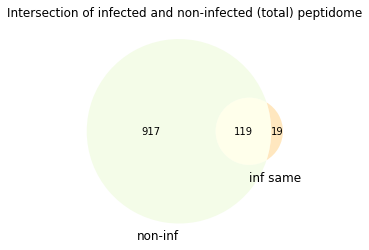

In [13]:
venn2([set(df_ninf['Peptide']), set(df_inf_same['Peptide'])], set_labels = ('non-inf', 'inf same'), set_colors=color)
plt.title('Intersection of infected and non-infected (total) peptidome')
biomarker=df_inf_same.merge(df_ninf, on=['Peptide','Accession'], indicator= True, how='outer')
biomarker=biomarker[['_merge','Peptide']].sort_values('_merge')
biomarker=biomarker.loc[(biomarker['_merge']=='left_only')]
biomarker.reset_index(inplace=True)
biomarker

Text(0.5, 1.0, 'Intersected peptidome of WF, infected \n and non-infected samples')

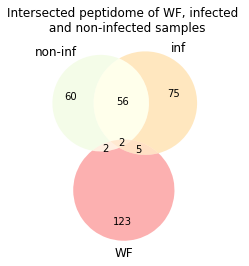

In [14]:
v=venn3([set(df_ninf_same['Peptide']), set(df_inf_same['Peptide']), set(df_WF_same['Peptide'])], set_labels = ('non-inf', 'inf', 'WF'), set_colors=color)
plt.title('Intersected peptidome of WF, infected \n and non-infected samples')

# To heatmap


In [15]:
mapp='peptide_sample_inf'
files = os.listdir(mapp)
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_inf = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.loc[(data['#Feature'] >= 4)] 
    data = data.groupby(['Peptide'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_inf = df_inf.append(data)  # appends all data


df_inf['count']=1
df_inf= df_inf.groupby(['Peptide'], as_index=False).sum()
df_inf = df_inf[['Peptide','#Feature','#Feature Sample 31', '#Feature Sample 34', '#Feature Sample 39','count',]]
df_inf = df_inf.sort_values(['Peptide'])


mapp='WF'
files = os.listdir(mapp)
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_WF = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.loc[(data['#Feature'] >= 4)] 
    data = data.groupby(['Peptide'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_WF = df_WF.append(data)  # appends all data


df_WF['count']=1
df_WF= df_WF.groupby(['Peptide'], as_index=False).sum()
df_WF = df_WF[['Peptide', '#Feature', '#Feature WF1','#Feature WF2', '#Feature WF 3', '#Feature WF4','#Feature WF5','count']]
df_WF = df_WF.sort_values(['Peptide'])
df_WF

mapp='peptide_sample_ninf'
files = os.listdir(mapp)
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_ninf = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.loc[(data['#Feature'] >= 4)] 
    data = data.groupby(['Peptide'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_ninf = df_ninf.append(data)  # appends all data


df_ninf['count']=1
df_ninf= df_ninf.groupby(['Peptide'], as_index=False).sum()
df_ninf = df_ninf[['Peptide','#Feature','#Feature Sample 13', '#Feature Sample 21', '#Feature Sample 33','count',]]
df_ninf = df_ninf.sort_values(['Peptide'])


In [16]:
heatmap_inf=pd.read_excel('heatmap.xlsx',sheet_name='inf')
heatmap_ninf=pd.read_excel('heatmap.xlsx',sheet_name='ninf')
heatmap_WF=pd.read_excel('heatmap.xlsx',sheet_name='WF')

df_inf['avg feat']=df_inf['#Feature']/df_inf['count']
df_ninf['avg feat']=df_ninf['#Feature']/df_ninf['count']
df_WF['avg feat']=df_WF['#Feature']/df_WF['count']

inf=df_inf['avg feat']*heatmap_inf['Deep-AmPEP30']
ninf=df_ninf['avg feat']*heatmap_ninf['Deep-AmPEP30']
WF=df_WF['avg feat']*heatmap_WF['Deep-AmPEP30']
inf=inf.sort_values(ascending=False)
ninf=ninf.sort_values(ascending=False)
WF=WF.sort_values(ascending=False)
inf.dropna
WF.dropna
ninf.dropna


<bound method Series.dropna of 32     12.981931
339    12.768635
73     12.404161
388    12.250035
35     12.192730
         ...    
15      0.008134
841     0.007656
460     0.006792
584     0.006155
985    -5.000000
Length: 1036, dtype: float64>

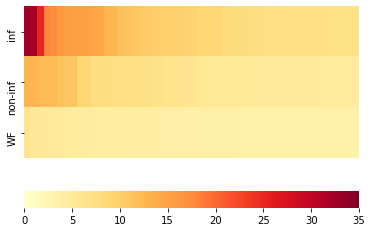

In [17]:
inf=inf[0:50]
ninf=ninf[0:50]
WF=WF[0:50]
ytick=['inf','non-inf','WF']
ax = sns.heatmap([inf,ninf, WF] ,vmin=0, vmax=35,cmap="YlOrRd", yticklabels=ytick, xticklabels=False,
                 cbar_kws={"orientation": "horizontal"},)